<a href="https://colab.research.google.com/github/AtharvaTambat/WnCC-SoC-2022-QML/blob/main/Increment_3_Qubit_State.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Incrementing 3 Qubit State**

## **1. Importing the Necessary Libraries**

In [2]:
import matplotlib.pyplot as plt
import math
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit.providers.aer import AerSimulator
from qiskit.visualization import plot_histogram

# Use Aer's qasm_simulator
simulator = AerSimulator()

## **2. The Circuit**

In [9]:
# User can input n bit number to be incremented by 1
n = 3

# Creating the Quantum Circuit
increment = QuantumCircuit(n,n)

# Initializing the qubits for the purpose of demonstration
# NOTE: The initial state is |0...011>
# Desired output is |0...0100> with probability 1
increment.x(0)
increment.x(1)
increment.barrier()

# Applying the required gates
increment.x(0)
increment.barrier()

increment.x(0)
increment.cnot(0,1)
increment.x(0)
increment.barrier()

increment.x(1)
increment.cnot(1,2)
increment.x(1)
increment.barrier()

# Measuring qubits
increment.measure(range(n),range(n))

increment.draw()

┌───┐ ░ ┌───┐ ░ ┌───┐     ┌───┐ ░                 ░ ┌─┐      
q_0: ┤ X ├─░─┤ X ├─░─┤ X ├──■──┤ X ├─░─────────────────░─┤M├──────
     ├───┤ ░ └───┘ ░ └───┘┌─┴─┐└───┘ ░ ┌───┐     ┌───┐ ░ └╥┘┌─┐   
q_1: ┤ X ├─░───────░──────┤ X ├──────░─┤ X ├──■──┤ X ├─░──╫─┤M├───
     └───┘ ░       ░      └───┘      ░ └───┘┌─┴─┐└───┘ ░  ║ └╥┘┌─┐
q_2: ──────░───────░─────────────────░──────┤ X ├──────░──╫──╫─┤M├
           ░       ░                 ░      └───┘      ░  ║  ║ └╥┘
c: 3/═════════════════════════════════════════════════════╩══╩══╩═
                                                          0  1  2

## **Measuring the Qubits**

Total count for possible combinations of output are:  {'100': 1024}


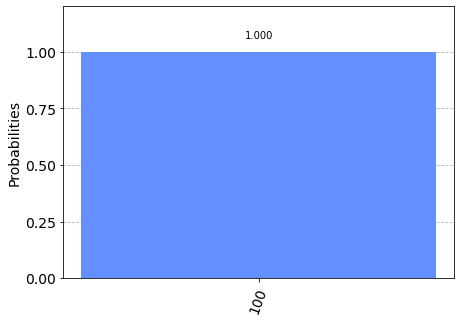

In [10]:
# Compiling the circuit
compiled_circuit = transpile(increment, simulator)

shots = 1000000
# Execute the circuit on the qasm simulator
job = simulator.run(compiled_circuit, shots)

# Grab results from the job
result = job.result()

# Returns counts
counts = result.get_counts(increment)
print("Total count for possible combinations of output are: ", counts)

# Plot a histogram
plot_histogram(counts)

🥳 🎉 Woooohoooh!!!!......We got the desired result 🥳 🎉